In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Load and preprocess data

In [2]:
def load_and_prepare_data():
    """Load MNIST dataset and normalize pixel values."""
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Normalize to 0–1 range
    x_train, x_test = x_train / 255.0, x_test / 255.0

    print("[INFO] Dataset loaded and normalized.")
    return x_train, y_train, x_test, y_test

Build model

In [3]:
def build_model():
    """Builds and returns a neural network model for digit classification."""
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    print("[INFO] Model architecture created successfully.")
    return model

Compile model

In [4]:
def compile_model(model):
    """Compile the model with optimizer, loss function, and metrics."""
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    print("[INFO] Model compiled successfully.")

Train model

In [5]:
def train_model(model, x_train, y_train, epochs=5):
    """Train the model using the MNIST training dataset."""
    print(f"[INFO] Training started for {epochs} epochs...")
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1)
    print("[INFO] Training completed.")
    return history

Evaluate model

In [6]:
def evaluate_model(model, x_test, y_test):
    """Evaluate the model on the test dataset."""
    loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
    print(f"[RESULT] Test Accuracy = {accuracy * 100:.2f}%")
    return accuracy


Predict a single Image

In [7]:
def predict_sample(model, x_test, y_test, index=0):
    """Predicts a digit for a given test sample and visualizes it."""
    predictions = model.predict(x_test)
    predicted_label = np.argmax(predictions[index])

    print(f"[PREDICTION] Model Prediction: {predicted_label}")
    print(f"[ACTUAL] Actual Label: {y_test[index]}")

    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


Main Execution

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[INFO] Dataset loaded and normalized.
[INFO] Model architecture created successfully.
[INFO] Model compiled successfully.
[INFO] Training started for 5 epochs...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8567 - loss: 0.4885
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9546 - loss: 0.1512
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9680 - loss: 0.1094
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9721 - loss: 0.0882
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9761 - loss: 0.0747
[INFO] Training completed.
313/313 - 1s - 2ms/step - accuracy: 0.9780 - loss: 0.0723
[RESULT] Test Accuracy = 97.80%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[PREDICTION] Model Prediction: 7
[ACTUAL] Actual Label: 7


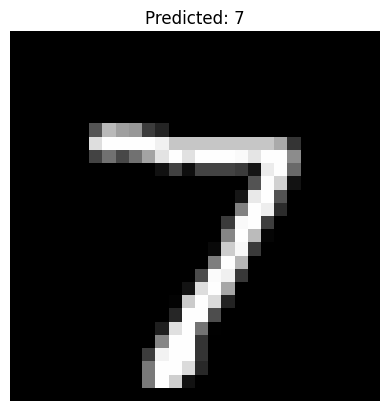

In [8]:
if __name__ == "__main__":
    # Step 1: Load Data
    x_train, y_train, x_test, y_test = load_and_prepare_data()

    # Step 2: Build Model
    model = build_model()

    # Step 3: Compile Model
    compile_model(model)

    # Step 4: Train Model
    train_model(model, x_train, y_train, epochs=5)

    # Step 5: Evaluate Model
    evaluate_model(model, x_test, y_test)

    # Step 6: Predict & Visualize
    predict_sample(model, x_test, y_test, index=0)